In [1]:
import numpy as np
import pandas as pd

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from matplotlib import pyplot as plt
%matplotlib inline

# type 4 mosaic data

In [2]:
# y = np.random.randint(0,10,5000)
# idx= []
# for i in range(10):
#     print(i,sum(y==i))
#     idx.append(y==i)

In [3]:
# x = np.zeros((5000,2))

# x[idx[0],:] = np.random.multivariate_normal(mean = [4,6.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[0]))

# x[idx[1],:] = np.random.multivariate_normal(mean = [5.5,6],cov=[[0.01,0],[0,0.01]],size=sum(idx[1]))

# x[idx[2],:] = np.random.multivariate_normal(mean = [4.5,4.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[2]))

# x[idx[3],:] = np.random.multivariate_normal(mean = [3,3.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[3]))

# x[idx[4],:] = np.random.multivariate_normal(mean = [2.5,5.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[4]))

# x[idx[5],:] = np.random.multivariate_normal(mean = [3.5,8],cov=[[0.01,0],[0,0.01]],size=sum(idx[5]))

# x[idx[6],:] = np.random.multivariate_normal(mean = [5.5,8],cov=[[0.01,0],[0,0.01]],size=sum(idx[6]))

# x[idx[7],:] = np.random.multivariate_normal(mean = [7,6.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[7]))

# x[idx[8],:] = np.random.multivariate_normal(mean = [6.5,4.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[8]))

# x[idx[9],:] = np.random.multivariate_normal(mean = [5,3],cov=[[0.01,0],[0,0.01]],size=sum(idx[9]))

In [4]:
# plt.figure(figsize=(6,6))
# for i in range(10):
#     plt.scatter(x[idx[i],0],x[idx[i],1],label="class_"+str(i))
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [5]:
# class SyntheticDataset(Dataset):
#   """MosaicDataset dataset."""

#   def __init__(self, x, y):
#     """
#       Args:
#         csv_file (string): Path to the csv file with annotations.
#         root_dir (string): Directory with all the images.
#         transform (callable, optional): Optional transform to be applied
#             on a sample.
#     """
#     self.x = x
#     self.y = y
#     #self.fore_idx = fore_idx
    
#   def __len__(self):
#     return len(self.y)

#   def __getitem__(self, idx):
#     return self.x[idx] , self.y[idx] #, self.fore_idx[idx]

In [6]:
# trainset = SyntheticDataset(x,y)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)
# classes = ('zero','one','two','three','four','five','six','seven','eight','nine')

# foreground_classes = {'zero','one','two'}
# fg_used = '012'
# fg1, fg2, fg3 = 0,1,2


# all_classes = {'zero','one','two','three','four','five','six','seven','eight','nine'}
# background_classes = all_classes - foreground_classes
# background_classes

In [7]:
# dataiter = iter(trainloader)
# background_data=[]
# background_label=[]
# foreground_data=[]
# foreground_label=[]
# batch_size=100

# for i in range(50):
#   images, labels = dataiter.next()
#   for j in range(batch_size):
#     if(classes[labels[j]] in background_classes):
#       img = images[j].tolist()
#       background_data.append(img)
#       background_label.append(labels[j])
#     else:
#       img = images[j].tolist()
#       foreground_data.append(img)
#       foreground_label.append(labels[j])
            
# foreground_data = torch.tensor(foreground_data)
# foreground_label = torch.tensor(foreground_label)
# background_data = torch.tensor(background_data)
# background_label = torch.tensor(background_label)

In [8]:
# def create_mosaic_img(bg_idx,fg_idx,fg): 
#   """
#   bg_idx : list of indexes of background_data[] to be used as background images in mosaic
#   fg_idx : index of image to be used as foreground image from foreground data
#   fg : at what position/index foreground image has to be stored out of 0-8
#   """
#   image_list=[]
#   j=0
#   for i in range(9):
#     if i != fg:
#       image_list.append(background_data[bg_idx[j]])
#       j+=1
#     else: 
#       image_list.append(foreground_data[fg_idx])
#       label = foreground_label[fg_idx] - fg1  # minus fg1 because our fore ground classes are fg1,fg2,fg3 but we have to store it as 0,1,2
#   #image_list = np.concatenate(image_list ,axis=0)
#   image_list = torch.stack(image_list) 
#   return image_list,label

In [9]:
# # number of data points in bg class and fg class
# nbg = sum(idx[3]) + sum(idx[4]) + sum(idx[5]) + sum(idx[6]) + sum(idx[7]) + sum(idx[8]) + sum(idx[9])
# nfg   = sum(idx[0]) + sum(idx[1]) + sum(idx[2])

# print(nbg, nfg, nbg+nfg)

In [10]:
# desired_num = 3000
# mosaic_list_of_images =[]      # list of mosaic images, each mosaic image is saved as list of 9 images
# fore_idx =[]                   # list of indexes at which foreground image is present in a mosaic image i.e from 0 to 9               
# mosaic_label=[]                # label of mosaic image = foreground class present in that mosaic
# list_set_labels = [] 
# for i in range(desired_num):
#   set_idx = set()
#   np.random.seed(i)
#   bg_idx = np.random.randint(0,nbg,8)
#   set_idx = set(background_label[bg_idx].tolist())
#   fg_idx = np.random.randint(0,nfg)
#   set_idx.add(foreground_label[fg_idx].item())
#   fg = np.random.randint(0,9)
#   fore_idx.append(fg)
#   image_list,label = create_mosaic_img(bg_idx,fg_idx,fg)
#   mosaic_list_of_images.append(image_list)
#   mosaic_label.append(label)
#   list_set_labels.append(set_idx)

In [11]:
# data =  [{"mosaic_list":mosaic_list_of_images, "mosaic_label": mosaic_label, "fore_idx":fore_idx}]
# np.save("type4_data_1.npy",data)

# load mosaic data

In [12]:
train_data = np.load("train_type4_data.npy",allow_pickle=True)

test_data = np.load("test_type4_data.npy",allow_pickle=True)

In [13]:
mosaic_list_of_images = train_data[0]["mosaic_list"]
mosaic_label = train_data[0]["mosaic_label"]
fore_idx = train_data[0]["fore_idx"]


test_mosaic_list_of_images = test_data[0]["mosaic_list"]
test_mosaic_label = test_data[0]["mosaic_label"]
test_fore_idx = test_data[0]["fore_idx"]

In [14]:
class MosaicDataset1(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list, mosaic_label,fore_idx):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list
    self.label = mosaic_label
    self.fore_idx = fore_idx
    
  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx] , self.fore_idx[idx]

In [15]:
batch = 250
train_dataset = MosaicDataset1(mosaic_list_of_images, mosaic_label, fore_idx)
train_loader = DataLoader( train_dataset,batch_size= batch ,shuffle=True)

test_dataset = MosaicDataset1(test_mosaic_list_of_images, test_mosaic_label, test_fore_idx)
test_loader = DataLoader(test_dataset,batch_size= batch ,shuffle=True)

# models

In [16]:
class Focus_deep(nn.Module):
    '''
       deep focus network averaged at zeroth layer
       input : elemental data
    '''
    def __init__(self,inputs,output,K,d):
        super(Focus_deep,self).__init__()
        self.inputs = inputs
        self.output = output
        self.K = K
        self.d  = d
        self.linear1 = nn.Linear(self.inputs,100)  #,self.output)
        #self.linear2 = nn.Linear(50,50)
        self.linear2 = nn.Linear(100,self.output) 
    def forward(self,z):
        batch = z.shape[0]
        x = torch.zeros([batch,self.K],dtype=torch.float64)
        y = torch.zeros([batch,self.d], dtype=torch.float64)
        x,y = x.to("cuda"),y.to("cuda")
        #print(z[:,0].shape,z[:,self.d*0:self.d*0+self.d].shape)
        for i in range(self.K):
            x[:,i] = self.helper(z[:,i] )[:,0]  # self.d*i:self.d*i+self.d
        x = F.softmax(x,dim=1)   # alphas
        x1 = x[:,0]
        for i in range(self.K):
            x1 = x[:,i]          
            y = y+torch.mul(x1[:,None],z[:,i])  # self.d*i:self.d*i+self.d
        return y , x 
    def helper(self,x):
      x = F.relu(self.linear1(x))
      #x = F.relu(self.linear2(x))
      x = self.linear2(x)
      return x


In [17]:
class Classification_deep(nn.Module):
    '''
       input : elemental data
       deep classification module data averaged at zeroth layer
    '''
    def __init__(self,inputs,output):
        super(Classification_deep,self).__init__()
        self.inputs = inputs
        self.output = output
        self.linear1 = nn.Linear(self.inputs,100)
        #self.linear2 = nn.Linear(50,50)
        self.linear2 = nn.Linear(100,self.output)

    def forward(self,x):
      x = F.relu(self.linear1(x))
      #x = F.relu(self.linear2(x))
      x = self.linear2(x)
      return x    

In [18]:
def calculate_attn_loss(dataloader,what,where,criter):
  what.eval()
  where.eval()
  r_loss = 0
  alphas = []
  lbls = []
  pred = []
  fidices = []
  with torch.no_grad():
    for i, data in enumerate(dataloader, 0):
      inputs, labels,fidx = data
      lbls.append(labels)
      fidices.append(fidx)
      inputs = inputs.double()
      inputs, labels = inputs.to("cuda"),labels.to("cuda")
      avg,alpha = where(inputs)
      outputs = what(avg)
      _, predicted = torch.max(outputs.data, 1)
      pred.append(predicted.cpu().numpy())
      alphas.append(alpha.cpu().numpy())
      loss = criter(outputs, labels)
      r_loss += loss.item()
  alphas = np.concatenate(alphas,axis=0)
  pred = np.concatenate(pred,axis=0)
  lbls = np.concatenate(lbls,axis=0)
  fidices = np.concatenate(fidices,axis=0)
  #print(alphas.shape,pred.shape,lbls.shape,fidices.shape) 
  analysis = analyse_data(alphas,lbls,pred,fidices)
  return r_loss/i,analysis

In [19]:
def analyse_data(alphas,lbls,predicted,f_idx):
    '''
       analysis data is created here
    '''
    batch = len(predicted)
    amth,alth,ftpt,ffpt,ftpf,ffpf = 0,0,0,0,0,0
    for j in range (batch):
      focus = np.argmax(alphas[j])
      if(alphas[j][focus] >= 0.5):
        amth +=1
      else:
        alth +=1
      if(focus == f_idx[j] and predicted[j] == lbls[j]):
        ftpt += 1
      elif(focus != f_idx[j] and predicted[j] == lbls[j]):
        ffpt +=1
      elif(focus == f_idx[j] and predicted[j] != lbls[j]):
        ftpf +=1
      elif(focus != f_idx[j] and predicted[j] != lbls[j]):
        ffpf +=1
    #print(sum(predicted==lbls),ftpt+ffpt)
    return [ftpt,ffpt,ftpf,ffpf,amth,alth]

# training

In [20]:
number_runs = 1
FTPT_analysis = pd.DataFrame(columns = ["FTPT","FFPT", "FTPF","FFPF"])
for n in range(number_runs):
  print("--"*40)
  
  # instantiate focus and classification Model
  torch.manual_seed(n+1)
  where = Focus_deep(2,1,9,2).double()
  torch.manual_seed(n)
  what = Classification_deep(2,3).double()
  where = where.to("cuda")
  what = what.to("cuda")



  # instantiate optimizer
  optimizer_where = optim.RMSprop(where.parameters(),lr =0.001)#,momentum=0.9)
  optimizer_what = optim.RMSprop(what.parameters(), lr=0.001)#,momentum=0.9)
  criterion = nn.CrossEntropyLoss()
  acti = []
  analysis_data = []
  loss_curi = []
  epochs = 2500


  # calculate zeroth epoch loss and FTPT values
  running_loss,anlys_data = calculate_attn_loss(train_loader,what,where,criterion)
  loss_curi.append(running_loss)
  analysis_data.append(anlys_data)

  print('epoch: [%d ] loss: %.3f' %(0,running_loss)) 

  # training starts 
  for epoch in range(epochs): # loop over the dataset multiple times
    ep_lossi = []
    running_loss = 0.0
    what.train()
    where.train()
    for i, data in enumerate(train_loader, 0):
      # get the inputs
      inputs, labels,_ = data
      inputs = inputs.double()
      inputs, labels = inputs.to("cuda"),labels.to("cuda")

      # zero the parameter gradients
      optimizer_where.zero_grad()
      optimizer_what.zero_grad()
      
      # forward + backward + optimize
      avg, alpha = where(inputs)
      outputs = what(avg)
      loss = criterion(outputs, labels)

      # print statistics
      running_loss += loss.item()
      loss.backward()
      optimizer_where.step()
      optimizer_what.step()

    running_loss,anls_data = calculate_attn_loss(train_loader,what,where,criterion)
    analysis_data.append(anls_data)
    print('epoch: [%d] loss: %.3f' %(epoch + 1,running_loss)) 
    loss_curi.append(running_loss)   #loss per epoch
    if running_loss<=0.01:
      break
  print('Finished Training run ' +str(n))

  torch.save(where.state_dict(),"type4_where_net.pt")
  torch.save(what.state_dict(),"type4_what_net.pt")
  analysis_data = np.array(analysis_data)
  FTPT_analysis.loc[n] = analysis_data[-1,:4]/30
  correct = 0
  total = 0
  with torch.no_grad():
    for data in train_loader:
      images, labels,_ = data
      images = images.double()
      images, labels = images.to("cuda"), labels.to("cuda")
      avg, alpha = where(images)
      outputs  = what(avg)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  print('Accuracy of the network on the 3000 train images: %d %%' % (  100 * correct / total))
    

--------------------------------------------------------------------------------
epoch: [0 ] loss: 2.092
epoch: [1] loss: 1.200
epoch: [2] loss: 1.193
epoch: [3] loss: 1.195
epoch: [4] loss: 1.191
epoch: [5] loss: 1.178
epoch: [6] loss: 1.174
epoch: [7] loss: 1.172
epoch: [8] loss: 1.166
epoch: [9] loss: 1.162
epoch: [10] loss: 1.157
epoch: [11] loss: 1.145
epoch: [12] loss: 1.154
epoch: [13] loss: 1.134
epoch: [14] loss: 1.130
epoch: [15] loss: 1.129
epoch: [16] loss: 1.112
epoch: [17] loss: 1.102
epoch: [18] loss: 1.096
epoch: [19] loss: 1.083
epoch: [20] loss: 1.080
epoch: [21] loss: 1.069
epoch: [22] loss: 1.069
epoch: [23] loss: 1.072
epoch: [24] loss: 1.041
epoch: [25] loss: 1.046
epoch: [26] loss: 1.024
epoch: [27] loss: 1.015
epoch: [28] loss: 1.005
epoch: [29] loss: 1.000
epoch: [30] loss: 0.988
epoch: [31] loss: 0.993
epoch: [32] loss: 0.969
epoch: [33] loss: 0.967
epoch: [34] loss: 0.948
epoch: [35] loss: 0.943
epoch: [36] loss: 0.939
epoch: [37] loss: 0.936
epoch: [38] loss

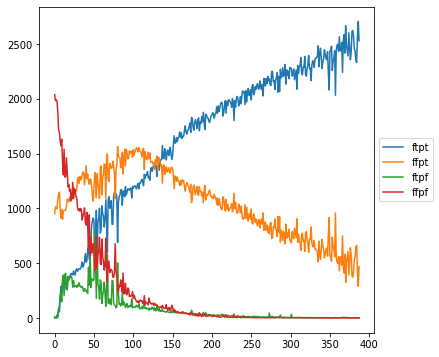

In [21]:
plt.figure(figsize=(6,6))
plt.plot(np.arange(0,epoch+2,1),analysis_data[:,0],label="ftpt")
plt.plot(np.arange(0,epoch+2,1),analysis_data[:,1],label="ffpt")
plt.plot(np.arange(0,epoch+2,1),analysis_data[:,2],label="ftpf")
plt.plot(np.arange(0,epoch+2,1),analysis_data[:,3],label="ffpf")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



# performance


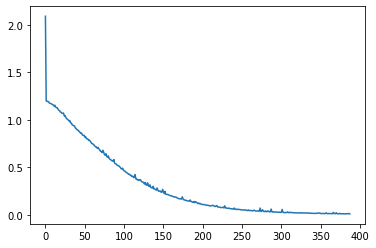

In [22]:
plt.plot(loss_curi)

In [23]:
np.mean(np.array(FTPT_analysis),axis=0)

array([8.43666667e+01, 1.56000000e+01, 3.33333333e-02, 0.00000000e+00])

In [24]:
FTPT_analysis.to_csv("synthetic_zeroth.csv",index=False)

In [25]:
FTPT_analysis

,FTPT,FFPT,FTPF,FFPF
0,84.366667,15.6,0.033333,0.0


# Visualising

In [26]:
xx,yy= np.meshgrid(np.arange(2,7,0.01),np.arange(3,8,0.01))
X = np.concatenate((xx.reshape(-1,1),yy.reshape(-1,1)),axis=1)
X = torch.Tensor(X).double().to("cuda")
Y = where.helper(X)
Y1 = what(X)

In [27]:
X.shape,Y.shape

(torch.Size([250000, 2]), torch.Size([250000, 1]))

In [28]:
X = X.to("cpu")
Y = Y.to("cpu")
X = X.detach().numpy()
Y = Y[:,0].detach().numpy()

No handles with labels found to put in legend.


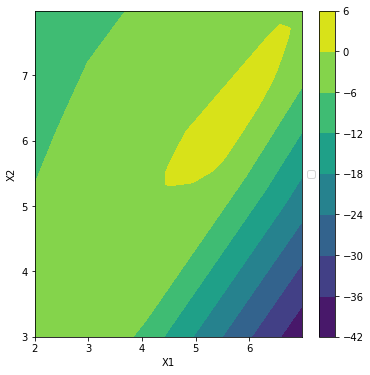

In [29]:
fig = plt.figure(figsize=(6,6))
cs = plt.contourf(X[:,0].reshape(xx.shape),X[:,1].reshape(yy.shape),Y.reshape(xx.shape))
plt.xlabel("X1")
plt.ylabel("X2")
fig.colorbar(cs)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("focus_contour.png")#,bbox_inches='tight')

In [30]:
Y1 = Y1.to("cpu")
Y1 = Y1.detach().numpy()
Y1 = torch.softmax(torch.Tensor(Y1),dim=1)
_,Z4= torch.max(Y1,1)
Z1 = Y1[:,0]
Z2 = Y1[:,1]
Z3 = Y1[:,2]

In [31]:
data = np.load("type_4_data.npy",allow_pickle=True)

In [32]:
x = data[0]["X"]
y = data[0]["Y"]
idx= []
for i in range(10):
  print(i,sum(y==i))
  idx.append(y==i)

0 482
1 485
2 536
3 504
4 493
5 513
6 497
7 486
8 522
9 482


In [33]:
avrg = []
with torch.no_grad():
  for i, data in  enumerate(train_loader):
          inputs , labels , fore_idx = data
          inputs = inputs.double()
          inputs, labels = inputs.to("cuda"),labels.to("cuda")
          avg_inp,alphas = where(inputs)
          avrg.append(avg_inp.detach().cpu().numpy())
avrg= np.concatenate(avrg,axis=0)

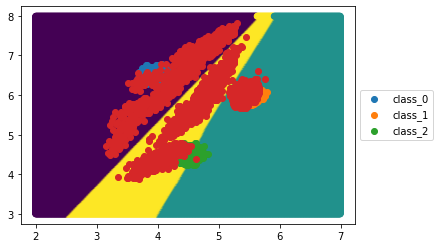

In [34]:
plt.scatter(X[:,0],X[:,1],c=Z4)
for i in range(3):
  plt.scatter(x[idx[i],0],x[idx[i],1],label="class_"+str(i))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.scatter(avrg[:,0],avrg[:,1])
#plt.savefig("decision_boundary.png",bbox_inches="tight")


In [35]:
true = []
pred = []
acc= 0
for i, data in  enumerate(train_loader):
        inputs , labels , fore_idx = data
        inputs = inputs.double()
        inputs  = inputs.to("cuda")
        avg_inp,alphas = where(inputs)
        outputs = what(avg_inp)
        _, predicted = torch.max(outputs.data, 1)
        true.append(labels)
        pred.append(predicted.cpu().numpy())
        acc+=sum(predicted.cpu() == labels)

In [36]:
true = np.concatenate(true,axis=0)
pred = np.concatenate(pred,axis=0)

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true,pred)

array([[ 962,    0,    0],
       [   0,  991,    0],
       [   0,    1, 1046]])